In [1]:
from db.helpers import new_sales_collection
from db.queries import new_sales_refenrece_ids_with_sales_count
from db.helpers import gm_sales_collection
import pandas as pd
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import random

/home/rageq8/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def prophet_forecast_model(df: pd.DataFrame,key):
    tmp = df[[key, "Sales_Period"]].copy()
    tmp = tmp.set_index("Sales_Period")
    tmp = tmp.reset_index()[["Sales_Period", key]].rename(
        columns={"Sales_Period": "ds", key: "y"}
    )
    model = Prophet(
        yearly_seasonality=False,
        seasonality_mode = 'multiplicative',
        # changepoint_prior_scale=30,
        # seasonality_prior_scale=30,
        )
    return model.fit(tmp)


def get_prediction(model: Prophet, number_of_months):
    future_dates = model.make_future_dataframe(periods=number_of_months, freq="MS")
    predictions = model.predict(future_dates)
    return predictions

def find_seg(data: list[dict], seg_len: int=3):
    seg = []
    for i in data:
        if i["Monthly_Sales"] == None and len(seg) > 0:
            seg.append(i)
        if i["Monthly_Sales"] != None and len(seg) == 0:
            seg.append(i)

        if i["Monthly_Sales"] != None and len(seg) > 0:
            if len(seg) == 1:
                seg.append(i)
            else:
                if len(seg) > seg_len:
                    seg = []
                    seg.append(i)
                    continue
                seg.append(i)
                yield seg
                seg = []

{'_id': 'Foodservice 786', 'fieldN': 31}


<Axes: xlabel='Sales_Period'>

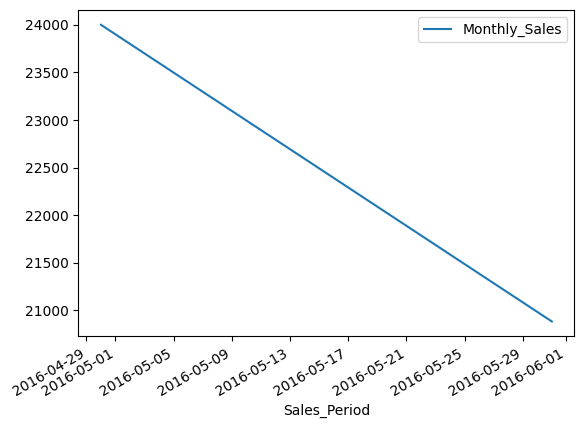

In [3]:
import numpy as np
reference_ids = list(new_sales_refenrece_ids_with_sales_count()) 
# id = random.choice(reference_ids) 
id = {'_id': 'Foodservice 786', 'fieldN': 31}

 
print(id)
sales = list(
    new_sales_collection.find(
        {
            "Reference_Full_ID": id['_id'],
            # "Reference_Full_ID":"Foodservice 4905"
            # "$and": [{"Sales_Month": {"$ne":4}},{"Sales_Year":{"$ne":2021}}],
        }
    ).sort("Sales_Period")
)
"""
issues to look for
- if all sales have the same value,


"""

sales = list(find_seg(sales))[0]

df = pd.DataFrame(sales)
df.plot(x="Sales_Period", y="Monthly_Sales")
# df = df.replace(0, np.nan)
# m = prophet_forecast_model(df,"Weekday_Store_Sales")
# forcast = get_prediction(m,1)
# display(forcast[['ds','yhat']])
# display(forcast)
# display(forcast[['ds','yhat']])
# plot_plotly(m,forcast)
# view generated sales charts

,_id,Primary_ID,Primary_Sheet,Primary_Full_ID,Reference_ID,Reference_Sheet,Reference_Full_ID,Company_Name,Industry_Level_2,Product_Focus,...,Store_Opening_Year,Store_Closing_Day,Store_Closing_Month,Store_Closing_Year,Info_Date,Source,Study,Researcher,Sales_Month,Sales_Year
0,64de1fc166c496bec71a41c4,8310,Sales,Sales 8310,786,Foodservice,Foodservice 786,Kuwait Food Company (Americana),Fast Food,Burger,...,0.0,0.0,0.0,0.0,2016-04-28,Survey,,Ali Boshehry,4,2016
1,64de1fc166c496bec71a41c4,8310,Sales,Sales 8310,786,Foodservice,Foodservice 786,Kuwait Food Company (Americana),Fast Food,Burger,...,0.0,0.0,0.0,0.0,2016-04-28,Survey,,Ali Boshehry,4,2016
2,64de1fc166c496bec71a41c5,8311,Sales,Sales 8311,786,Foodservice,Foodservice 786,Kuwait Food Company (Americana),Fast Food,Burger,...,0.0,0.0,0.0,0.0,2018-11-01,Algorithm,,Algorithm,5,2016


<Axes: xlabel='Sales_Period'>

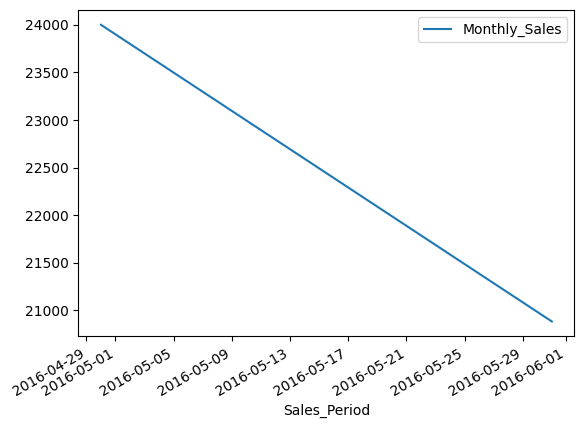

In [4]:
tmp_df = df.copy()
display(tmp_df)
tmp_df['Monthly_Sales'] = tmp_df['Monthly_Sales'].interpolate()
tmp_df.plot(x='Sales_Period',y='Monthly_Sales')

{'_id': 'Service 3499', 'fieldN': 62}

<Axes: xlabel='Sales_Period'>

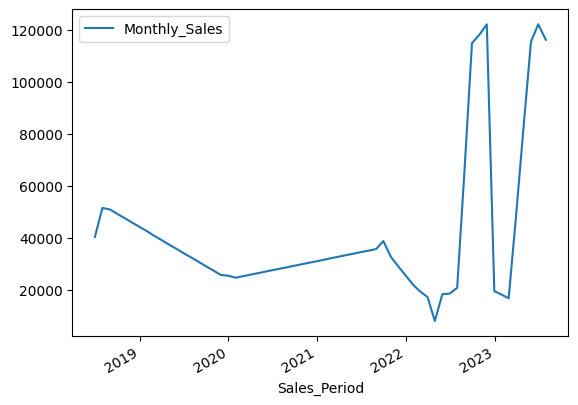

In [36]:
reference_ids = list(new_sales_refenrece_ids_with_sales_count()) 
id = random.choice(reference_ids) 
# id = {'_id': 'Foodservice 168429', 'fieldN': 3}
display(id)
sales = new_sales_collection.find({"Reference_Full_ID":id['_id']})
sales = list(sales)
sales = pd.DataFrame(sales)
# display(sales[sales['Monthly_Sales'].notna()]['Sales_Period'])
sales.plot(x='Sales_Period',y='Monthly_Sales')
# sales['Monthly_Sales'] = sales['Monthly_Sales'].interpolate()
# sales.plot(x='Sales_Period',y='Monthly_Sales')

In [6]:
df = pd.read_csv('./output/method_1.csv')

10511


73369.8943939737

,RID,MONTH,YEAR,Store Opening Month,Store Opening Year,Store Closing Month,Store Closing Year,Weekday Store Sales,Weekday Delivery Sales,Weekend Store Sales,Weekend Delivery Sales,original,Weekday Total Sales,Weekend Total Sales,Monthly Store Sales,Monthly Delivery Sales,Monthly Sales,Sales_Period
count,73.0,73.000000,73.000000,73.0,73.0,73.0,73.0,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,7.300000e+01,73.000000,7.300000e+01,73
mean,10511.0,6.424658,2020.547945,0.0,0.0,0.0,0.0,30829.166878,711.413979,485.643836,711.413979,0.068493,31540.580857,1197.057814,6.204685e+05,19919.591402,6.403881e+05,2020-12-30 20:42:44.383561728
min,10511.0,1.000000,2018.000000,0.0,0.0,0.0,0.0,120.006760,0.439643,359.000000,0.439643,0.000000,282.291458,485.439643,6.280135e+03,12.309999,1.082411e+04,2018-01-01 00:00:00
25%,10511.0,3.000000,2019.000000,0.0,0.0,0.0,0.0,553.057090,387.502718,485.000000,387.502718,0.000000,1063.443432,865.706445,1.494114e+04,10850.076109,2.905035e+04,2019-07-01 00:00:00
50%,10511.0,6.000000,2021.000000,0.0,0.0,0.0,0.0,2679.572677,484.240030,485.000000,484.240030,0.000000,3319.493632,969.240030,5.747145e+04,13558.720849,7.336989e+04,2021-01-01 00:00:00
75%,10511.0,9.000000,2022.000000,0.0,0.0,0.0,0.0,10570.842260,710.875061,485.000000,710.875061,0.000000,11938.459489,1195.875061,2.152968e+05,19904.501695,2.511019e+05,2022-07-01 00:00:00
max,10511.0,12.000000,2024.000000,0.0,0.0,0.0,0.0,512577.610780,4450.098071,830.000000,4450.098071,1.000000,512993.747102,4935.098071,1.025543e+07,124602.745999,1.026708e+07,2024-01-01 00:00:00
std,0.0,3.511560,1.756267,0.0,0.0,0.0,0.0,91139.975219,733.344888,45.726351,733.344888,0.254338,91111.203238,737.409430,1.822798e+06,20533.656868,1.822026e+06,NaN


307152    21168.0
307153    20104.0
307154    46480.0
307155    23520.0
307156    27160.0
Name: Monthly Sales, dtype: float64

<Axes: title={'center': '10511'}, xlabel='Sales_Period'>

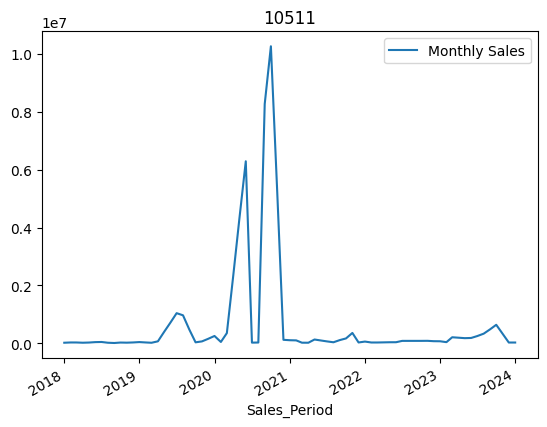

In [14]:
import pandas as pd
unique_rids = df['RID'].unique()
id = random.choice(unique_rids)
id = 10511
print(id)
tmp = df[df['RID'] == id].copy()
tmp['Monthly Sales'] = tmp['Monthly Sales'].interpolate(method='cubic')
tmp['Sales_Period'] = pd.to_datetime(tmp[['YEAR','MONTH']].assign(DAY=1))
generated_df = tmp[tmp['original'] == 0]
actual_df = tmp[tmp['original'] == 1]
display(tmp['Monthly Sales'].median())
display(tmp.describe())
display(actual_df['Monthly Sales'])
tmp.plot(title=id,x='Sales_Period',y='Monthly Sales')